# Attending a Doctor's Appointment...or Not.

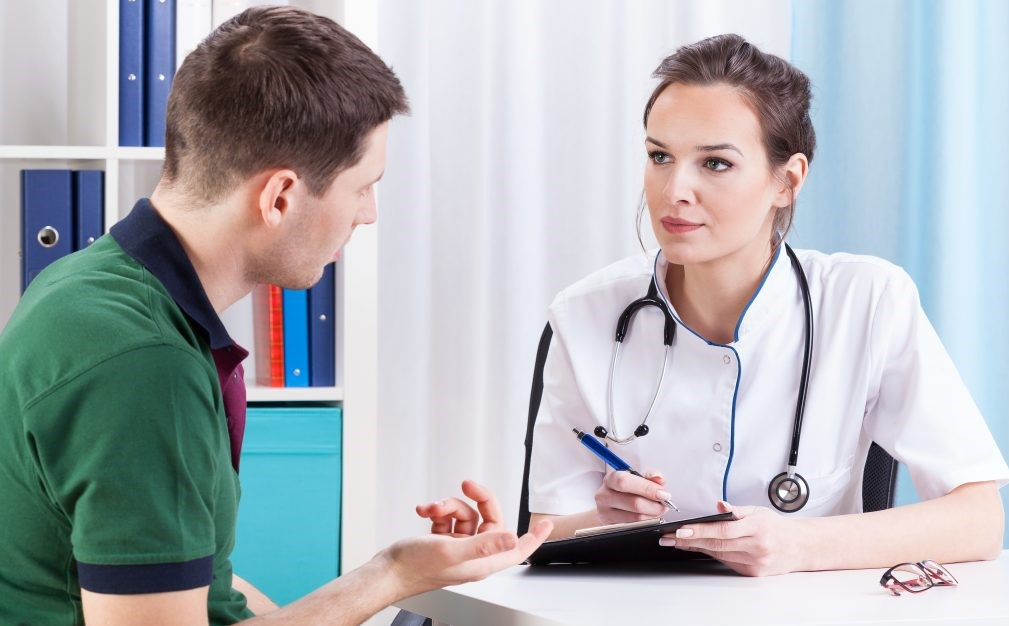

## Project Overview

A doctor waits...and waits...AND waits...Where is the patient? Where are MULTIPLE patients? In every doctor's office around the globe there are instances when people miss doctor appointments. What is the reason? Does it have to do with the doctor's behavior? Is something wrong with the patient? Is a specific kind of person constantly missing their designated appointments? Is some event occurring to illicit an absence from a doctor's office? These are all questions to explore in determining why patients are missing at scheduled doctor appointments.

## Business Problem

In this project, I am acting with a doctor's office in a Brazilian neighborhood. The doctor's office expresses concern that patients are not showing up for their doctor appointments. I plan to help the doctor's office determine what factors caused patients to avoid scheduled doctor appointments and what types of patients are most likely to skip their scheduled doctor appointment. I desire to provide insight on how to eliminate potential "no-show" appointments.

## The Data

This project uses data from a Kaggle dataset about medical appointment "no-shows". The Medical Appointment No-Shows dataset can be found at https://www.kaggle.com/joniarroba/noshowappointments. The dataset covers the attendance records for doctor appointments in 81 neighborhoods in Brazil. There are 110527 rows of appointments in the dataset.

I decided what data columns from this dataset to use and how to use them.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
df=pd.read_csv('KaggleV2-May-2016.csv', parse_dates=['ScheduledDay', 'AppointmentDay'] )
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
df.shape

(110527, 14)

In [3]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [4]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


## Data Cleaning

I started by changing the "No-show" column values from "No" and "Yes" to "0" and "1" for the purposes of doing a classification examination. I created a plot of this change.The records of each appointment scenario are graphed with 88208 attended appointments and 22319 "no-show" appointments with the doctor's office. I observed that about 80 percent of the appointments were attended and 20 percent of the appointments were "no-shows". 

In [6]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

In [7]:
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

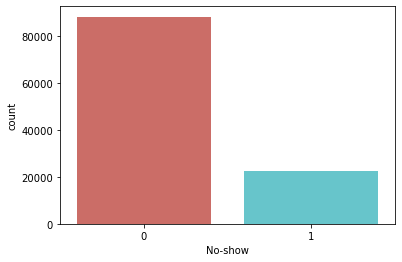

In [8]:
sns.countplot(x='No-show', data=df, palette= 'hls')
plt.show()

In [9]:
len(df['No-show'])

110527

In [10]:
len(df.loc[df['No-show'] == 0])

88208

In [11]:
len(df.loc[df['No-show'] == 0])/len(df['No-show'])

0.798067440534892

In [12]:
len(df.loc[df['No-show'] == 1])/len(df['No-show'])

0.20193255946510807

I changed some of the column names to appropriate English dictionary terminology.

In [13]:
df= df.rename(columns= {"Handcap": "Handicap", "Hipertension": "Hypertension"})

In [14]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


I got value counts for the columns I am going to use from the original dataset in my analysis.

In [16]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [17]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [18]:
df.Hypertension.value_counts()

0    88726
1    21801
Name: Hypertension, dtype: int64

In [19]:
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [20]:
df.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [21]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In the next few cells is code where I changed the "AppointmentDay" column to represent the day of the week for each appointment and added those values to a column with the title "DayoftheWeek". Also, I subtracted the "AppointmentDay" column from the "ScheduledDay" column and added a column titled "DayDifference" to represent how many days out the appointment was scheduled from the actual day the appointment was set to take place.

In [22]:
df['AppointmentDay'].dt.date

0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
             ...    
110522    2016-06-07
110523    2016-06-07
110524    2016-06-07
110525    2016-06-07
110526    2016-06-07
Name: AppointmentDay, Length: 110527, dtype: object

In [23]:
df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Length: 110527, dtype: timedelta64[ns]

In [24]:
df['DayDifference']= df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date

In [25]:
df['DayDifference'].dt.days

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: DayDifference, Length: 110527, dtype: int64

In [26]:
df['DayDifference']=df['DayDifference'].dt.days

In [27]:
df['DayoftheWeek']= df['AppointmentDay'].dt.weekday

I created a new dataframe to contain all the columns I am going to use in my analyses and looked at the data types of each column. 

In [28]:
newdf = df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "Neighbourhood", "Handicap"] , axis=1)
newdf

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No-show,DayDifference,DayoftheWeek
0,F,62,0,1,0,0,0,0,0,4
1,M,56,0,0,0,0,0,0,0,4
2,F,62,0,0,0,0,0,0,0,4
3,F,8,0,0,0,0,0,0,0,4
4,F,56,0,1,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,0,0,0,0,1,0,35,1
110523,F,51,0,0,0,0,1,0,35,1
110524,F,21,0,0,0,0,1,0,41,1
110525,F,38,0,0,0,0,1,0,41,1


In [29]:
newdf.dtypes

Gender           object
Age               int64
Scholarship       int64
Hypertension      int64
Diabetes          int64
Alcoholism        int64
SMS_received      int64
No-show           int64
DayDifference     int64
DayoftheWeek      int64
dtype: object

I grouped all of my analysis columns by the "No-show" column. I determined the average age for a "no-show" is 34.3 years old and the average number of days away from an appointment for a "no-show" to occur on the appointment day is 15.8 days.

In [30]:
newdf.groupby('No-show').mean()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,DayDifference,DayoftheWeek
No-show,,,,,,,,
0,37.790064,0.093903,0.204392,0.073837,0.030417,0.291334,8.754659,1.857439
1,34.317667,0.115507,0.169004,0.064071,0.030333,0.438371,15.831489,1.861419


I instantiated my train-test split for classification and encoded the "Gender" column to an "Is-male" column of 0s and 1s to be used in my analysis.

In [31]:
X=newdf.drop("No-show", axis=1)
y=newdf['No-show']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
encoder= LabelEncoder()
encoder.fit(X[['Gender']])
X['Is_male']= encoder.transform(X[['Gender']])

C:\Users\jmsti\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [33]:
X.drop(['Gender'], axis= 1, inplace= True)

In [34]:
X['Is_male']

0         0
1         1
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: Is_male, Length: 110527, dtype: int32

In [35]:
X.columns

Index(['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'SMS_received', 'DayDifference', 'DayoftheWeek', 'Is_male'],
      dtype='object')

## Data Modeling

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [37]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Tree-Based Model Type

After trying different models including logistic regression and k nearest neighbors, I chose to stick with a tree based model instead of some other model type. My focus was on getting an accurate model that had a lot of interaction terms. A tree based model seemed best for my evaluations.

I started off with the first decision tree classifier model below that was very overfit. I decided to use this model to look at possible parameters for a parameter grid and produce another tree model to help improve model performance. I created graphs of max tree depth, minimum samples splits, and minimum samples for a leaf for my next tree model.

In [38]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion= 'entropy', random_state= 10)
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [39]:
ytree_test_preds= clf.predict(X_test_scaled)
ytree_train_preds= clf.predict(X_train_scaled)

probytree_test_preds= clf.predict_proba(X_test_scaled)
probytree_train_preds= clf.predict_proba(X_train_scaled)

In [40]:
print('Training Accuracy: ', accuracy_score(y_train, ytree_train_preds))
print('Testing Accuracy: ', accuracy_score(y_test, ytree_test_preds))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, ytree_train_preds))
print('Testing F1-Score: ', f1_score(y_test, ytree_test_preds))

Training Accuracy:  0.9098377465468364
Testing Accuracy:  0.7510495078170237



Training F1-Score:  0.7260464775309728
Testing F1-Score:  0.2803640548174495


In [41]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probytree_test_preds[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.56


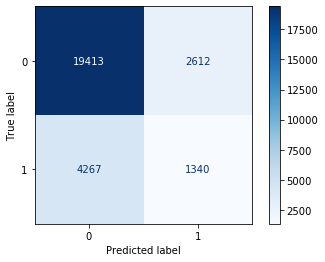

In [42]:
plot_confusion_matrix(clf, X_test_scaled, y_test,
                     cmap=plt.cm.Blues)
plt.show()

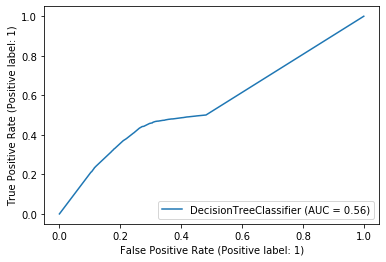

In [43]:
plot_roc_curve(clf, X_test_scaled, y_test)
plt.show()

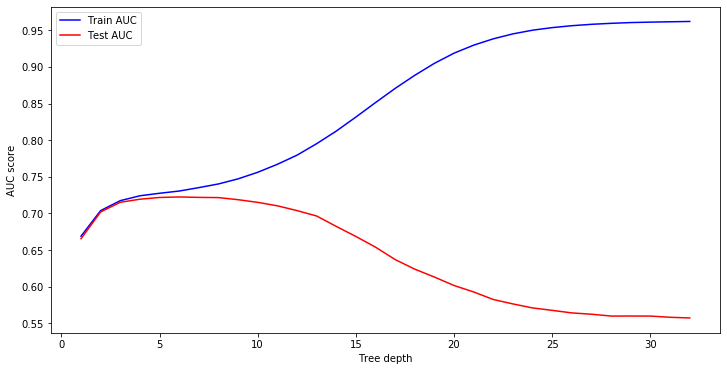

In [44]:
import numpy as np
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=10)
   clf.fit(X_train_scaled, y_train)
   probytree_train_preds= clf.predict_proba(X_train_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, probytree_train_preds[:,1])
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   probytree_test_preds= clf.predict_proba(X_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probytree_test_preds[:,1])
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

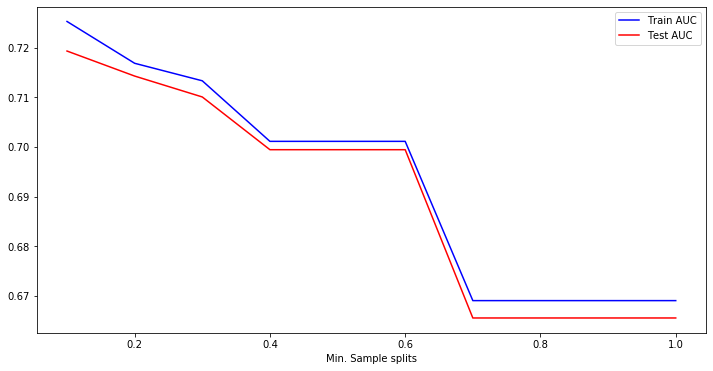

In [45]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=10)
   clf.fit(X_train_scaled, y_train)
   probytree_train_preds= clf.predict_proba(X_train_scaled)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, probytree_train_preds[:,1])
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   probytree_test_preds= clf.predict_proba(X_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probytree_test_preds[:,1])
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

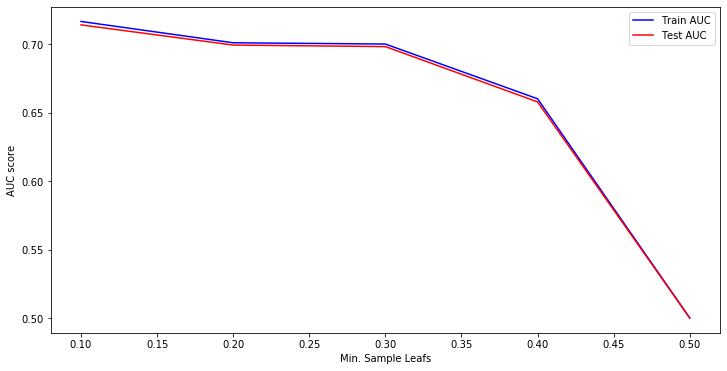

In [46]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=10)
   clf.fit(X_train_scaled, y_train)
   probytree_train_preds= clf.predict_proba(X_train_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, probytree_train_preds[:,1])
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   probytree_test_preds= clf.predict_proba(X_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probytree_test_preds[:,1])
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

### New Tree-Based Model

I instantiated a new tree-based model. However, that did not do well with the parameters I put into it. I put that model into the random forest and grid search models below to help prune my tree models further and come up with best parameters for my final tree-based model that used GridSearchCV.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rf= RandomForestClassifier(criterion='entropy',
                           max_depth= 5,
                           min_samples_split= .5,
                           min_samples_leaf= .3, 
                           random_state=10,
                           class_weight= 'balanced')


In [48]:
rf.fit(X_train_scaled, y_train)
rf_test_preds= rf.predict_proba(X_test_scaled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_test_preds[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.68


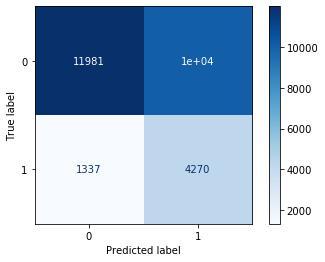

In [49]:
plot_confusion_matrix(rf, X_test_scaled, y_test,
                     cmap=plt.cm.Blues)
plt.show()

In [50]:
params={
    'criterion': ['entropy'],
    'max_depth': [5,10,15,20],
    'min_samples_split': [.1,.3,.5,.7,.9],
    'min_samples_leaf': [.1,.2,.3,.4,.5]
    
}

In [51]:
from sklearn.model_selection import GridSearchCV
gsearch=GridSearchCV(rf, params, scoring= 'f1')


In [52]:
gsearch.fit(X_train_scaled,y_train)


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy', max_depth=5,
                                              min_samples_leaf=0.3,
                                              min_samples_split=0.5,
                                              random_state=10),
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'min_samples_split': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='f1')

Below are the best parameters my grid search came up with. The accuracy scores and AUC scores for the final model are listed as well.

In [53]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 0.2,
 'min_samples_split': 0.1}

In [54]:
gsearch.best_estimator_.score(X_test_scaled,y_test)

0.5733569774174869

In [55]:
gsearch.best_estimator_.score(X_train_scaled, y_train)

0.5744254780143555

In [56]:
gsearchprob_test_preds=gsearch.best_estimator_.predict_proba(X_test_scaled)
gsearchprob_train_preds=gsearch.best_estimator_.predict_proba(X_train_scaled)

In [57]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gsearchprob_test_preds[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.69


My f1 score below was best for my final model. I wanted to get fairly balanced precision and recall scores. The recall score is high for this model. This is shown by the confusion matrix. False positives outweigh false negatives. However, in the following ROC curve true positive rates are starting to get more weight than false positive rates in comparison to previous models. The trend in "no-shows" is staring to being identified. I would rather believe someone was not going to show up for an appointment and have them show up than believe a person was going to show up for an appointment and have them be a "no-show". Recall represents a minimization of false negatives. The roc curve shows there is a .7 area under the curve when comparing the false positive and true positive rates. This is the best AUC value for a model created for this project displaying my final tree-based model as a good model.

In [58]:
gsearch_test_preds=gsearch.best_estimator_.predict(X_test_scaled)
gsearch_train_preds=gsearch.best_estimator_.predict(X_train_scaled)

print('Training Recall: ', recall_score(y_train, gsearch_train_preds))
print('Testing Recall: ', recall_score(y_test, gsearch_test_preds))
print('\n\n')
print('Training F1-Score: ', f1_score(y_train, gsearch_train_preds))
print('Testing F1-Score: ', f1_score(y_test, gsearch_test_preds))

Training Recall:  0.8234202967927238
Testing Recall:  0.8161227037631532



Training F1-Score:  0.43824840764331213
Testing F1-Score:  0.43703739076452885


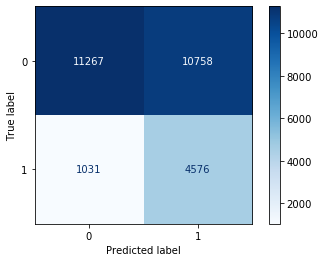

In [59]:
plot_confusion_matrix(gsearch.best_estimator_, X_test_scaled, y_test,
                     cmap=plt.cm.Blues)
plt.show()

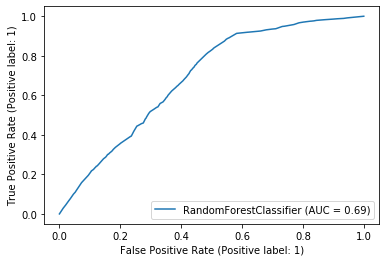

In [60]:
plot_roc_curve(gsearch.best_estimator_, X_test_scaled, y_test)
plt.show()

I chose to look at the feature importances for my final tree-based model. Age, SMS_received, and DayDifference seemed to be the columns most influential in the results of the data.

In [61]:
gsearch.best_estimator_.feature_importances_

array([0.29039932, 0.        , 0.        , 0.        , 0.        ,
       0.30014927, 0.35442321, 0.02272013, 0.03230807])

In [62]:
dict(zip(X.columns, gsearch.best_estimator_.feature_importances_))

{'Age': 0.2903993194861846,
 'Scholarship': 0.0,
 'Hypertension': 0.0,
 'Diabetes': 0.0,
 'Alcoholism': 0.0,
 'SMS_received': 0.30014926732696556,
 'DayDifference': 0.35442321153969497,
 'DayoftheWeek': 0.022720126880315453,
 'Is_male': 0.03230807476683935}

Text(0, 0.5, 'Feature Importance')

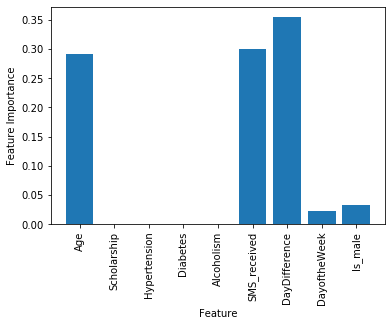

In [63]:
plt.bar(X.columns, gsearch.best_estimator_.feature_importances_)
plt.xticks(rotation= 90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')

I decided to include permutation importance because feature importance does not reshuffle the features to create more balanced results. The directions of the feature importance is not obvious by itself. Permutation importance allows for preserving the distribution of the variable of each predictor that influences model performance. The Age and DayDifference columns still seem to be the columns that hold the most weight when analyzing the data.

In [64]:
from sklearn.inspection import permutation_importance 

result= permutation_importance(gsearch.best_estimator_, X_train_scaled, y_train)
result

{'importances_mean': array([ 1.55859823e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.21255806e-03,  1.02867483e-01, -2.65395983e-05,
         2.70221364e-04]),
 'importances_std': array([3.94089236e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.03244288e-04, 9.59523200e-04, 7.86995907e-05,
        5.73997334e-05]),
 'importances': array([[ 1.60082031e-02,  1.48742385e-02,  1.54774112e-02,
          1.57669341e-02,  1.58031244e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [-4.81331805e-03, -4.19808191e-03, -4.10157428e-03,
         -3.57078

In [65]:
result.importances_mean

array([ 1.55859823e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.21255806e-03,  1.02867483e-01, -2.65395983e-05,
        2.70221364e-04])

In [66]:
dict(zip(X.columns, result.importances_mean))

{'Age': 0.015585982266722965,
 'Scholarship': 0.0,
 'Hypertension': 0.0,
 'Diabetes': 0.0,
 'Alcoholism': 0.0,
 'SMS_received': -0.0042125580553712405,
 'DayDifference': 0.10286748296037156,
 'DayoftheWeek': -2.653959828700092e-05,
 'Is_male': 0.0002702213643766216}

Text(0, 0.5, 'Permutation Importance')

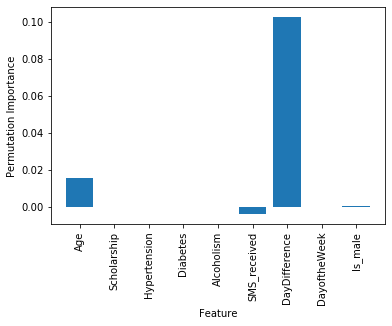

In [67]:
plt.bar(X.columns, result.importances_mean)
plt.xticks(rotation= 90)
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')

## Conclusions

- Age should be included in the doctor office analyses. The Age column seemed to exhibit high logistic regression importance, random forest feature importance, and permutation importance as well. The average age of a "no-show" was lower than the average age of a person who attended an appointment.  Older people appear to attend appointments more often than younger people on average. Further analysis might help.


- Book less appointments farther out from the actual appointment day. The average number of days 
away from an appointment for a "no-show" was higher than the average number of days away from an appointment of someone who attended their appointment. Also, the DayDifference column seemed to have high logistic regression importance, random forest feature importance, and permutation importance.


- Remind people more frequently of their appointment whether by phone or text. The DayDifference columns and SMS_received columns showed strong relationships with "no-shows". The DayDifference column and SMS _received columns seemed to have high logistic regression importance, random forest feature importance, and permutation importance. Appointment reminders could help decrease the number of "no-show" appointments and increase memory potential of a scheduled appointment before the appointment takes place. 


## Recommendations for Further Analysis

- Consider gender more in future analyses. Gender had slight logistic regression importance, random forest feature importance, and permutation importance.


- Procure a "no-show" analysis based on neighborhood. Some neighborhoods may have stronger correlations with "no-shows" than others.